<a href="https://colab.research.google.com/github/KEERTHANA2103/PRODIGY_DS_03/blob/main/bank_marketing_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task -03**

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

#**Import the Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


#**Load the Dataset**

In [3]:
df = pd.read_csv('/content/bank (1).csv')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.shape

(11162, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

#**Exploratory Data Analysis**

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [14]:
category_cols = df.select_dtypes(include='object').columns
print(category_cols)

numeric_cols = df.select_dtypes(exclude='object').columns
print(numeric_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [16]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


# **Data Visualizations**

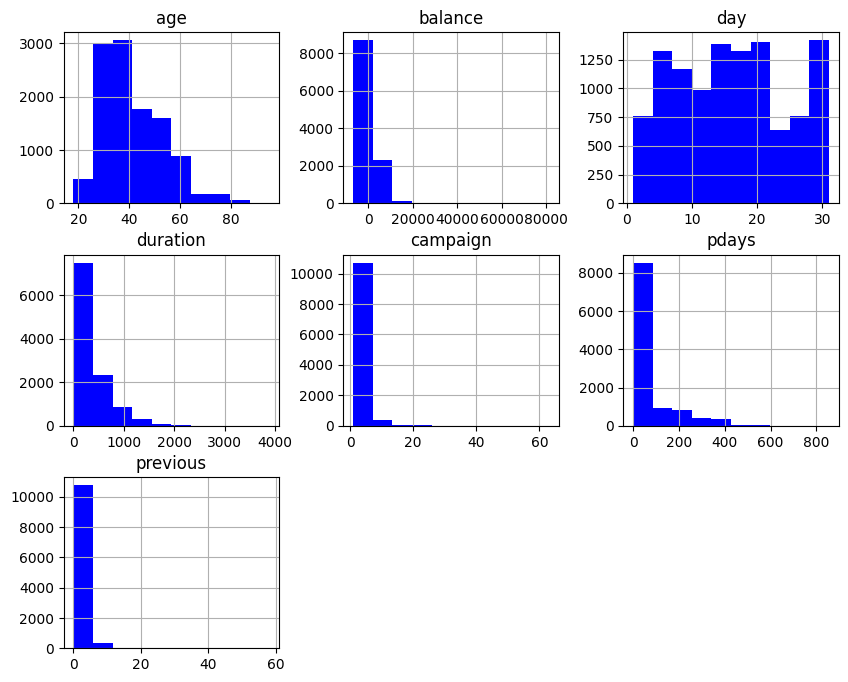

In [19]:
df.hist(figsize=(10,8),color='blue')
plt.show()

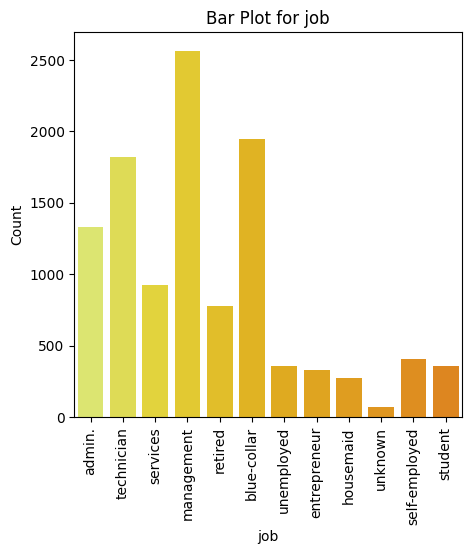

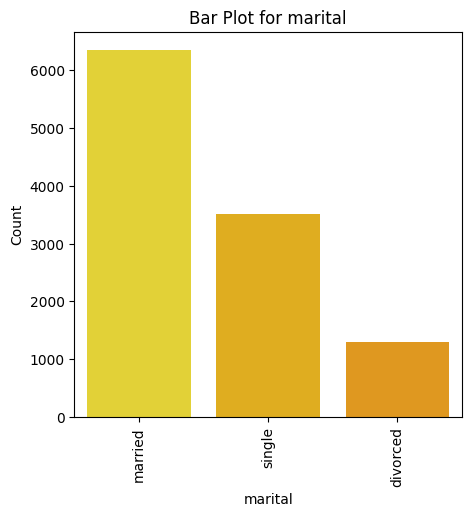

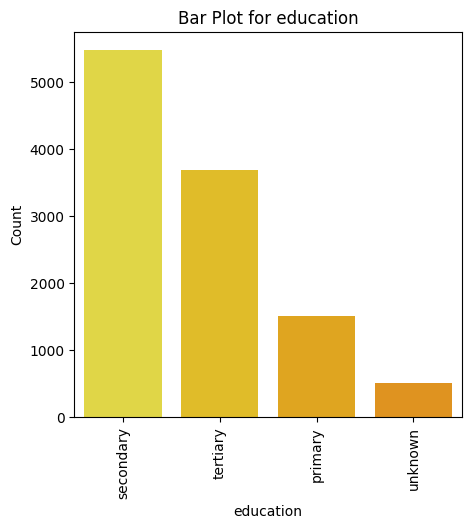

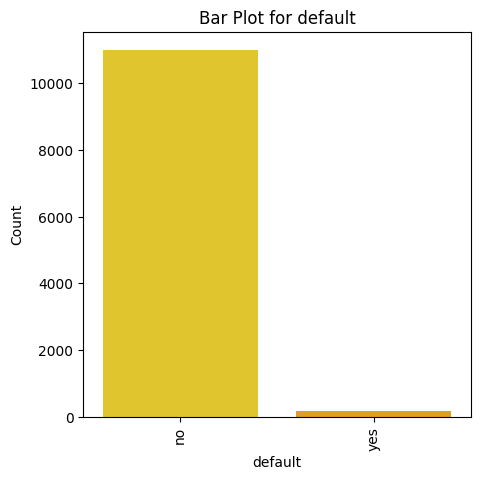

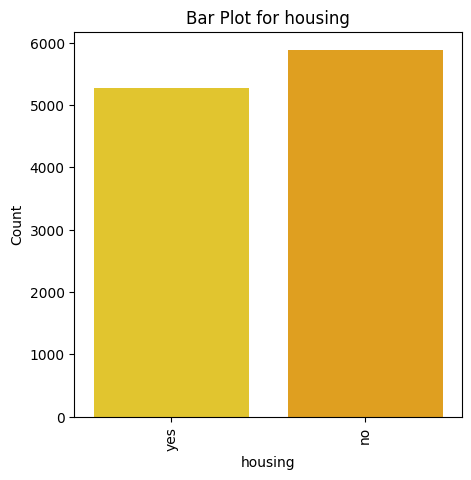

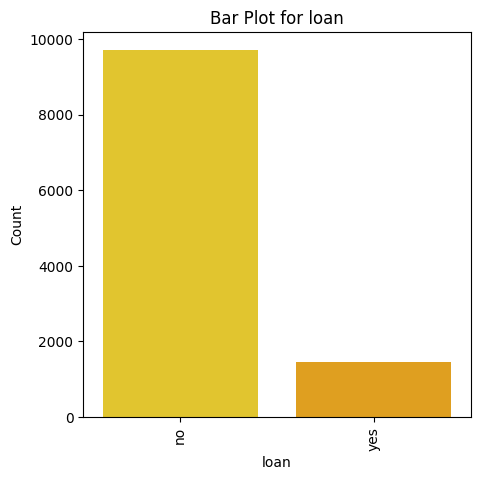

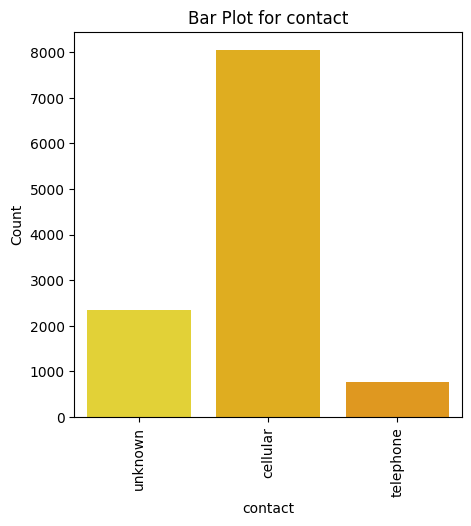

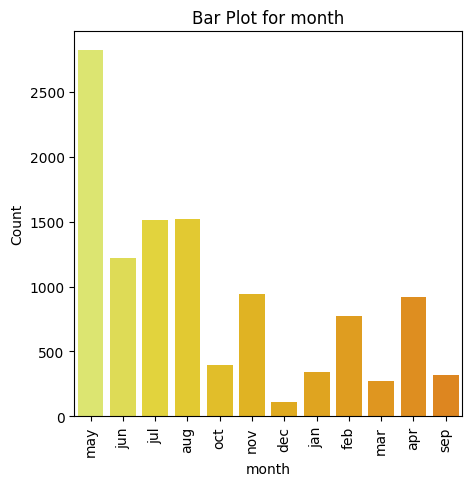

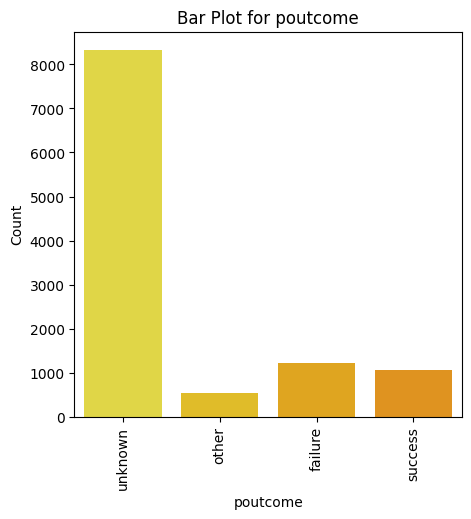

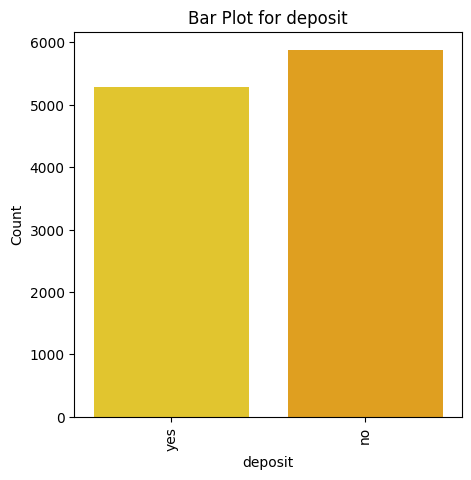

In [20]:
for feature in category_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

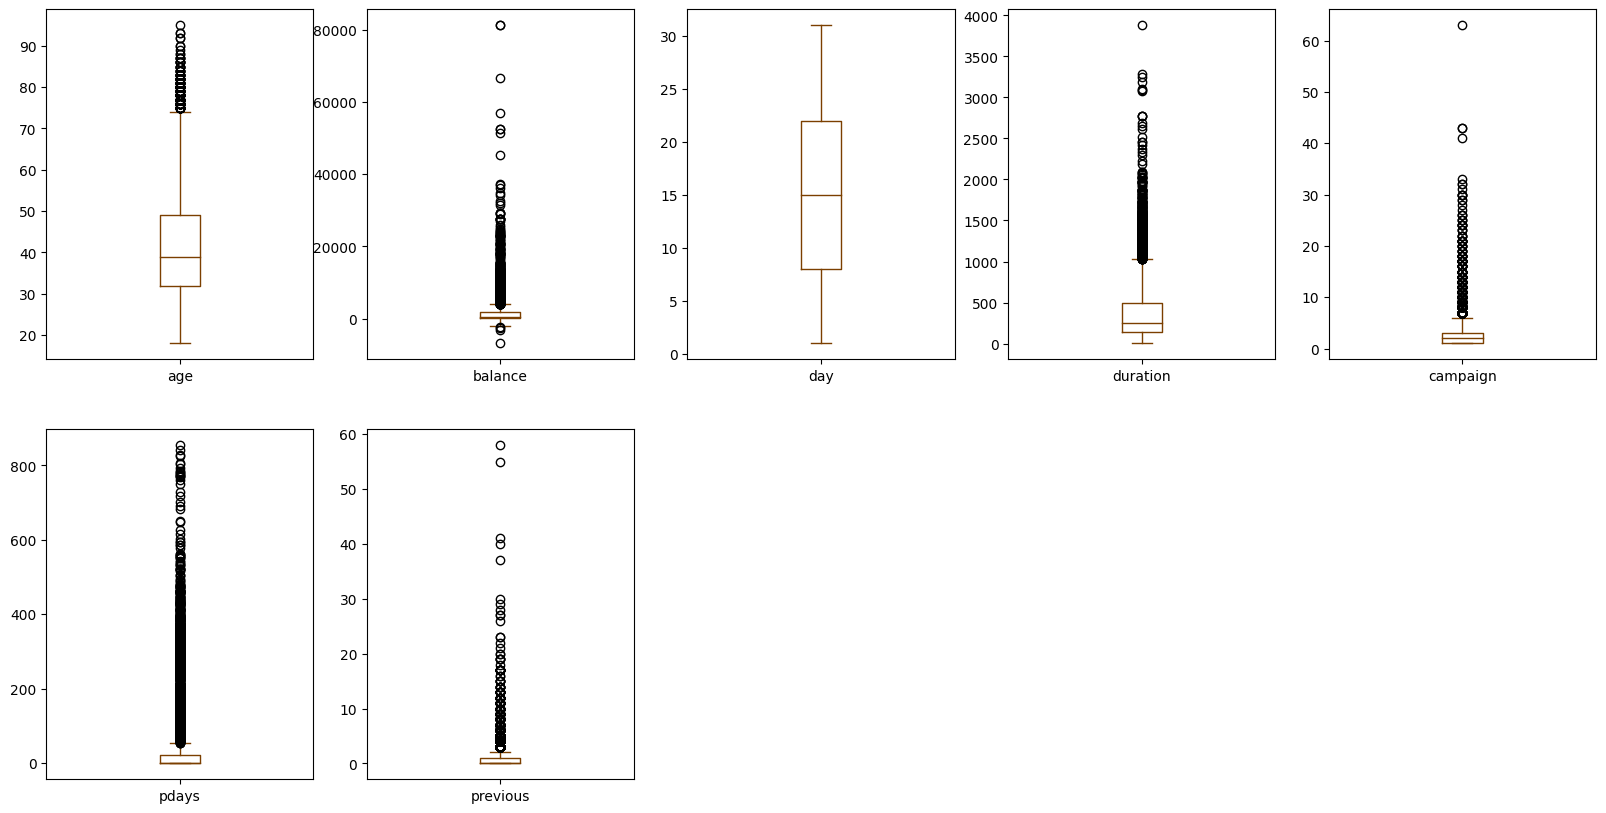

In [21]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [22]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

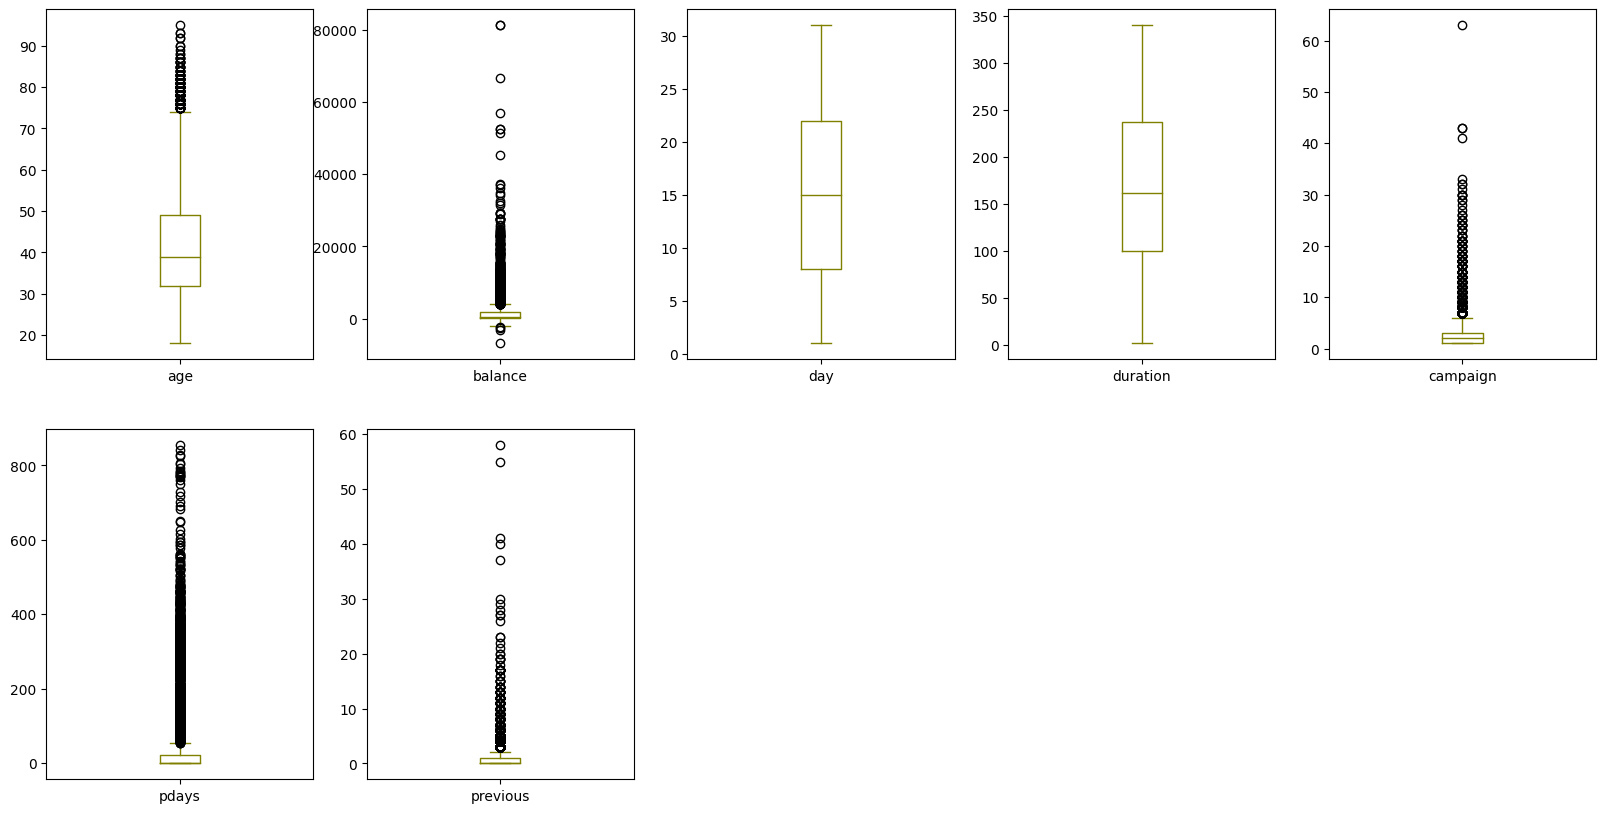

In [23]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762 -0.007572 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.041714 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.086588  0.137007 -0.077232 -0.058981
duration -0.007572  0.041714 -0.086588  1.000000 -0.201434  0.088653  0.066075
campaign -0.005278 -0.013894  0.137007 -0.201434  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232  0.088653 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981  0.066075 -0.049699  0.507272  1.000000


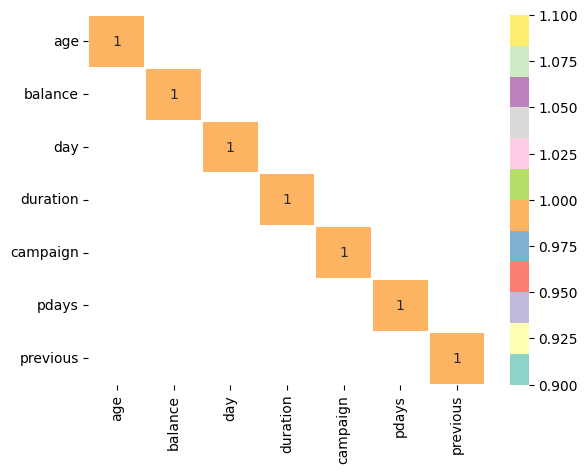

In [24]:
corr = df.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [26]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [29]:
df1.shape

(11162, 17)

In [30]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,339,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,339,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,339,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,339,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,339,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


In [31]:
df_encoded['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [32]:
x = df_encoded.drop('deposit',axis=1)
y = df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(11162, 16)
(11162,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#**Model Selection and Training**

In [33]:
from sklearn.model_selection import train_test_split

print(4119*0.25)

1029.75


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8371, 16)
(2791, 16)
(8371,)
(2791,)


In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [38]:
mscore(dt)

Training Score 0.8058774339983276
Testing Score 0.7832318165532067


In [39]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 1 0]


In [40]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.7832318165532067
Confusion Matrix
 [[1047  410]
 [ 195 1139]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      1457
           1       0.74      0.85      0.79      1334

    accuracy                           0.78      2791
   macro avg       0.79      0.79      0.78      2791
weighted avg       0.79      0.78      0.78      2791



In [41]:
from sklearn.tree import plot_tree

In [42]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


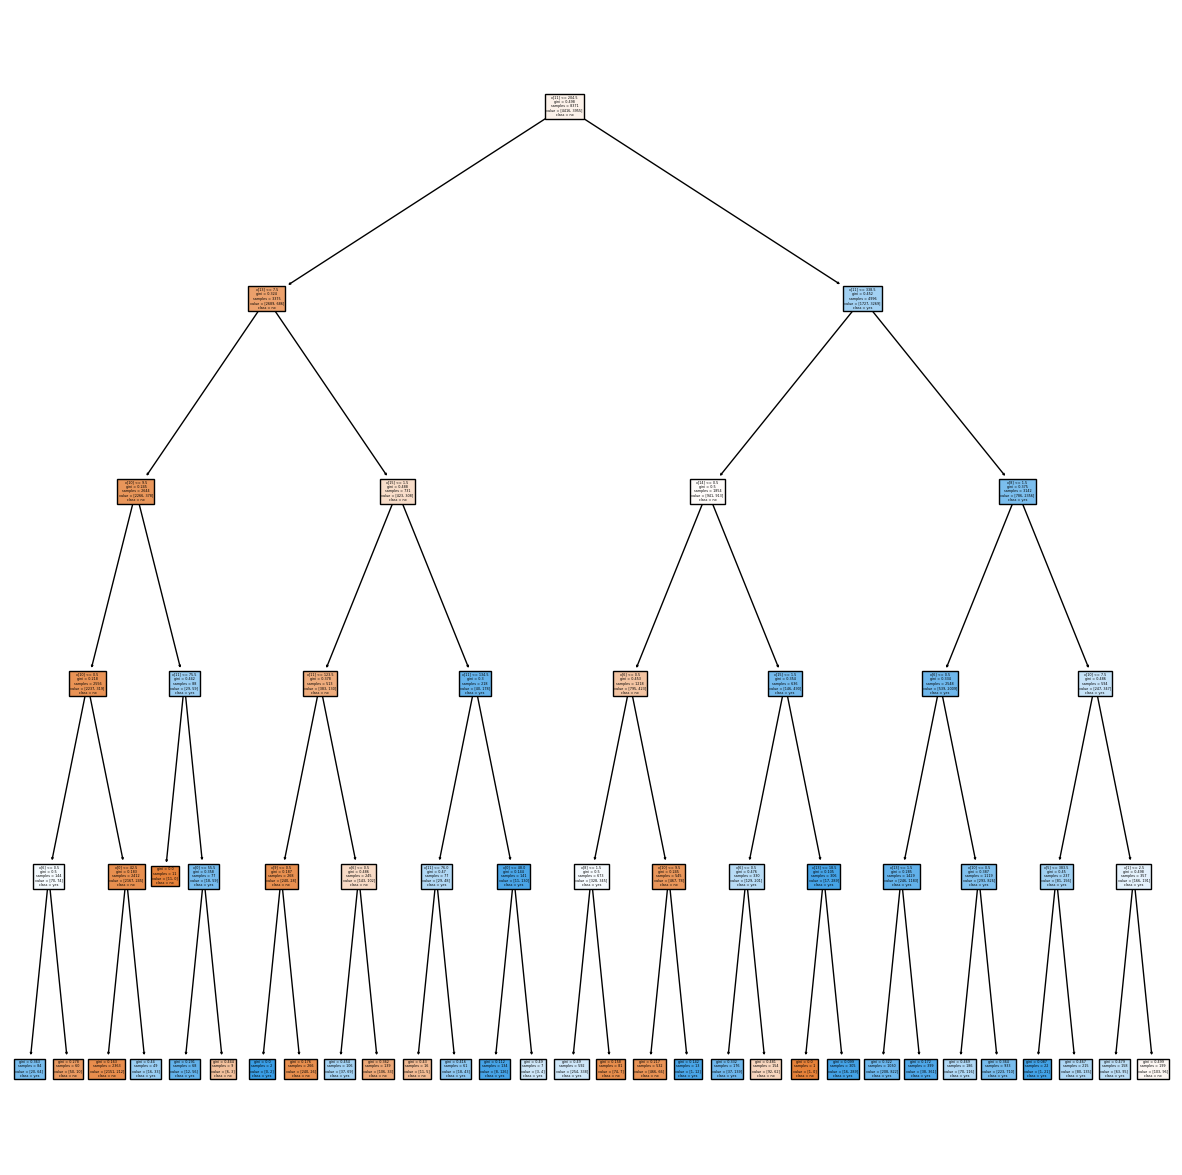

In [50]:
plt.figure(figsize=(15,15))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [44]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [45]:
mscore(dt1)

Training Score 0.7675307609604587
Testing Score 0.7642422070942314


In [46]:
ypred_dt1 = dt1.predict(x_test)

In [47]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.7642422070942314
Confusion Matrix
 [[1144  313]
 [ 345  989]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1457
           1       0.76      0.74      0.75      1334

    accuracy                           0.76      2791
   macro avg       0.76      0.76      0.76      2791
weighted avg       0.76      0.76      0.76      2791



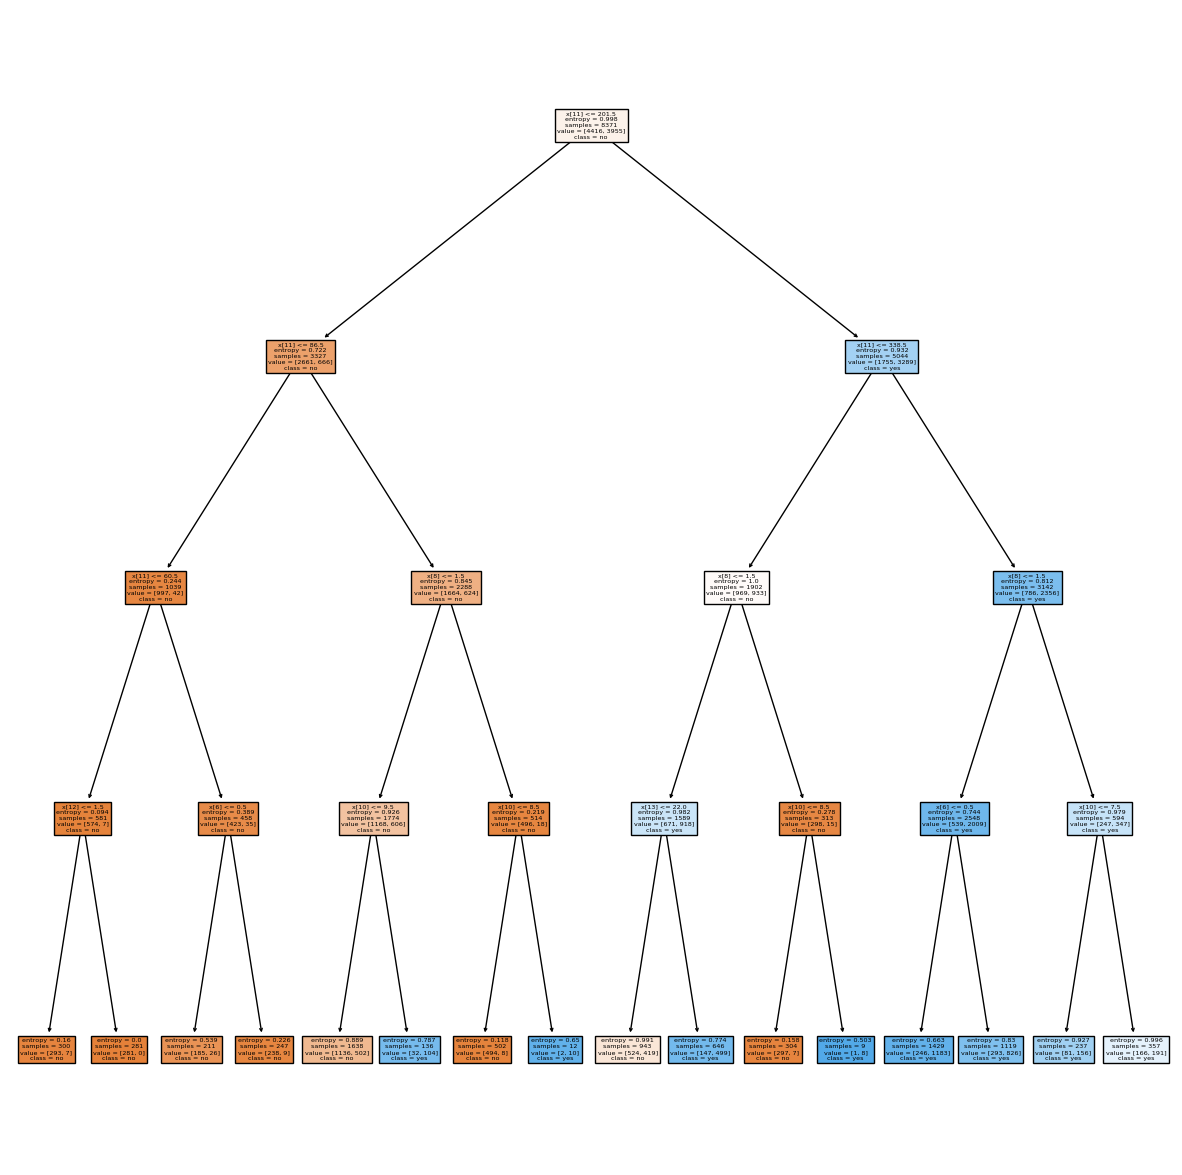

In [48]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()